# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_df = pd.read_csv("../cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

cities_df.head(3)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.5,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.8,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.2,2.37


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [4]:
# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# List for holding temperature of each city
temp = []
humidity = []
cloudiness = []
windspeed = []
lat = []
lng = []
city_name = []
country = []

# Loop through the list of cities and perform a request for data on each, while keeping count of the city number
for n, city in enumerate(cities, 1):
    
    # Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    
    # Get weather info from JSON response and add to the list
    try:    
        temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        lat.append(weather_json['coord']['lat']) 
        lng.append(weather_json['coord']['lon']) 
        city_name.append(city)
        country.append(weather_json['sys']['country'])
        # print log of each city as it's being processed (city number and city name).
        print(f"[{n}]: {city.title()} processed.")
        
    except:
        # Skip over to the new city while counting city
        print(f"[{n}]: City not found.")
        pass
    

[1]: Gat processed.
[2]: Hilo processed.
[3]: Georgetown processed.
[4]: Avarua processed.
[5]: Mabilao processed.
[6]: Taltal processed.
[7]: Bluff processed.
[8]: Ushuaia processed.
[9]: Lubbock processed.
[10]: Ahipara processed.
[11]: Ramban processed.
[12]: Torbay processed.
[13]: Saint Pete Beach processed.
[14]: Kovur processed.
[15]: Saskylakh processed.
[16]: Fernley processed.
[17]: Hithadhoo processed.
[18]: Port Elizabeth processed.
[19]: Albany processed.
[20]: Lebu processed.
[21]: Carnarvon processed.
[22]: Hofn processed.
[23]: Methoni processed.
[24]: Kaitangata processed.
[25]: College processed.
[26]: City not found.
[27]: Strezhevoy processed.
[28]: Esperance processed.
[29]: Rikitea processed.
[30]: Dawlatabad processed.
[31]: Punta Arenas processed.
[32]: Mantua processed.
[33]: Hambantota processed.
[34]: Mitu processed.
[35]: Jamestown processed.
[36]: Flinders processed.
[37]: Chuy processed.
[38]: Ust-Kuyga processed.
[39]: Butaritari processed.
[40]: Axim pro

[311]: Deputatskiy processed.
[312]: Thompson processed.
[313]: Hami processed.
[314]: Kromy processed.
[315]: Hamilton processed.
[316]: Umea processed.
[317]: Jahazpur processed.
[318]: Makakilo City processed.
[319]: Severomuysk processed.
[320]: Leshukonskoye processed.
[321]: Evensk processed.
[322]: Sorata processed.
[323]: Aswan processed.
[324]: Te Anau processed.
[325]: Nivala processed.
[326]: Itoman processed.
[327]: Porto Novo processed.
[328]: Adra processed.
[329]: Sorland processed.
[330]: Larsnes processed.
[331]: Lagos processed.
[332]: Sabang processed.
[333]: Santa Lucia processed.
[334]: Atagay processed.
[335]: Saint George processed.
[336]: Terre-De-Bas processed.
[337]: Anadyr processed.
[338]: Potsdam processed.
[339]: Maarianhamina processed.
[340]: City not found.
[341]: Mercedes processed.
[342]: Gallup processed.
[343]: Beringovskiy processed.
[344]: Henties Bay processed.
[345]: Kaitong processed.
[346]: Ngawen processed.
[347]: Beloha processed.
[348]: Lua

In [7]:
# Checking how many city samples in total
len(temp)

569

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_api_data_df = pd.DataFrame({
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": windspeed
    })

# Save Data to csv
cities_api_data_df.to_csv("Output Data/City_Data.csv")
cities_api_data_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,gat,IL,31.61,34.76,77.00,62,0,2.73
1,hilo,US,19.73,-155.09,84.20,66,40,10.29
2,georgetown,MY,5.41,100.34,77.00,94,20,3.36
3,avarua,CK,-21.21,-159.78,75.20,64,86,10.29
4,mabilao,PH,16.15,120.42,83.35,73,24,3.33


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
### USE THE STUFF HERE FOR GOING FORWARD WITH THE REST OF THE HW
humidity100_df = cities_api_data_df.loc[cities_api_data_df['Humidity (%)'] > 100, :]
humidity100_df.head(3)

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [16]:
#  Get the indices of cities that have humidity over 100%.
# # https://stackoverflow.com/questions/41217310/get-index-of-a-row-of-a-pandas-dataframe-as-an-integer/42853445
# humidity100_index = humidity100_df.index.values.astype(int)
# humidity100_index

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [ ]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

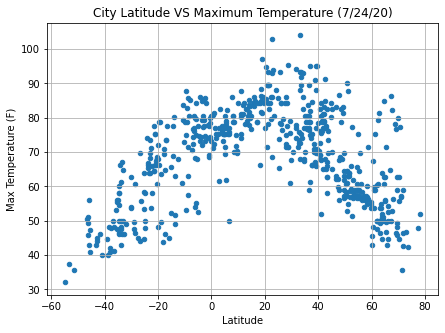

In [22]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Max Temperature (F)', title='City Latitude VS Maximum Temperature (7/24/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_maxT.png")
plt.show()

## Latitude vs. Humidity Plot

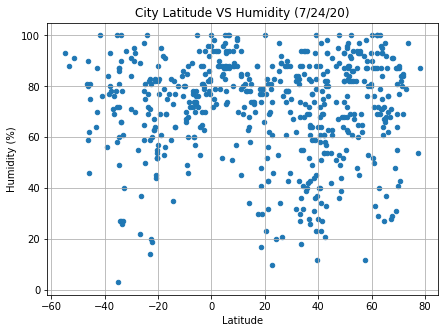

In [23]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='City Latitude VS Humidity (7/24/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

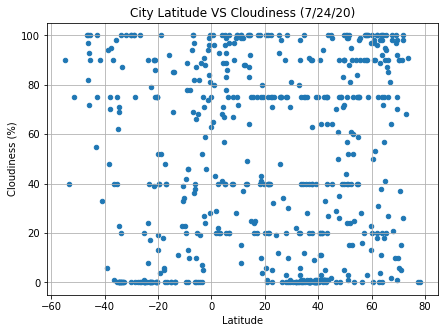

In [24]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='City Latitude VS Cloudiness (7/24/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

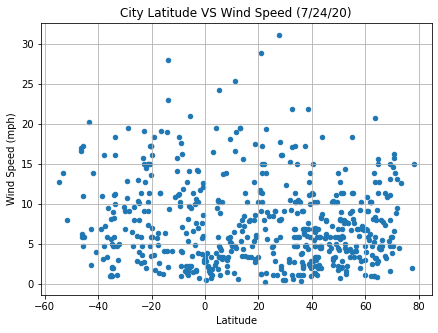

In [25]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', title='City Latitude VS Wind Speed (7/24/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_windspeed.png")
plt.show()

## Linear Regression

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = cities_api_data_df.loc[cities_api_data_df['Latitude'] >= 0, :]
southern_hem_df = cities_api_data_df.loc[cities_api_data_df['Latitude'] < 0, :]
cities_api_data_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,gat,IL,31.61,34.76,77.00,62,0,2.73
1,hilo,US,19.73,-155.09,84.20,66,40,10.29
2,georgetown,MY,5.41,100.34,77.00,94,20,3.36
3,avarua,CK,-21.21,-159.78,75.20,64,86,10.29
4,mabilao,PH,16.15,120.42,83.35,73,24,3.33
...,...,...,...,...,...,...,...,...
564,hobyo,SO,5.35,48.53,77.04,73,78,24.25
565,raga,SS,8.46,25.68,70.12,89,97,5.73
566,masvingo,ZW,-20.06,30.83,48.27,82,52,5.93
567,indramayu,ID,-6.33,108.32,76.17,74,97,8.08


In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotweather(df,y, hem):
    # Scatter plot
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.title(f'{hem} Hemisphere - {y} vs. Latitude (7/24/20)')
    x = df['Latitude']
    y = df[y]
    plt.scatter(x, y)
    
    # Add linear regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    plt.plot(x,regress,"r-")
    print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40043646807086736


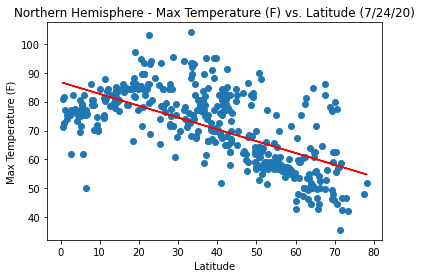

In [27]:
y = 'Max Temperature (F)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)
    
# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6142781384195334


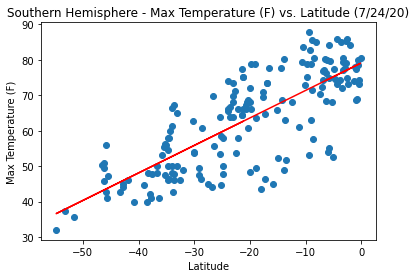

In [28]:
y = 'Max Temperature (F)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and maximum temperature in the northern and southern hemispheres. 

The model for the northern hemisphere suggests a weak negative correlation between the latitude and the maximum tempeature. As the latitude increases, the maximum temperature decreases.

The model for the southern hemisphere suggests a moderate-to-weak positive correlation between the latitude and the maximum tempeature compared to the model for the northern hemisphere. As the latitude increases, the maximum temperature also increases. The southern hemisphere model indicates a stronger correlation, compared to the norther hemisphere model.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0025878934686387836


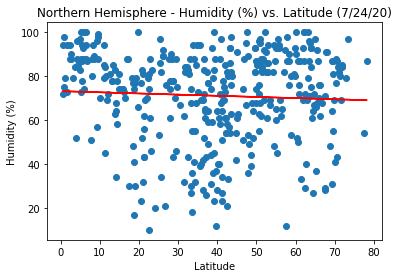

In [29]:
y = 'Humidity (%)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008341339837624572


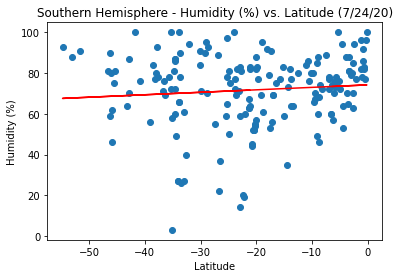

In [30]:
y = 'Humidity (%)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and percentage humdity in the northern and southern hemispheres. 

The models for both the northern and southern hemisphere suggest that there are almost no correlation between the percentage humdity and the latitude, as indicated by the very low r-squared of almost 0.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.8846432300435265e-06


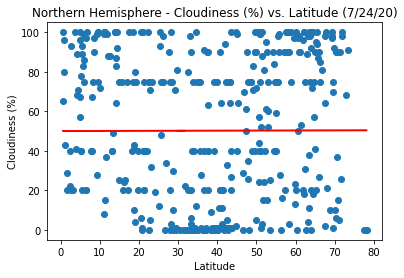

In [31]:
y = 'Cloudiness (%)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0031648189593943546


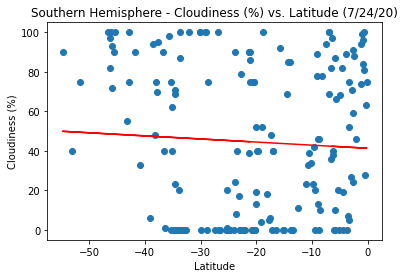

In [32]:
y = 'Cloudiness (%)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and percentage cloudiness in the northern and southern hemispheres. 

The models for both the northern and southern hemisphere suggest that there are almost no correlation between the percentage cloudiness and the latitude, as indicated by the r-squared of almost 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.6196389686733574e-05


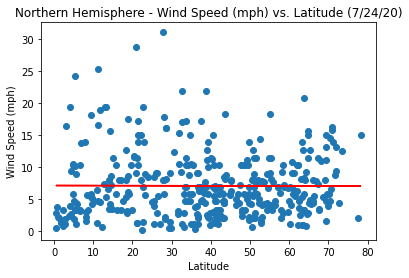

In [33]:
y = 'Wind Speed (mph)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0032873524687172186


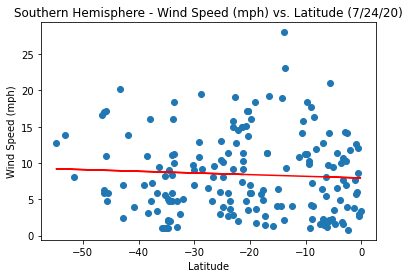

In [34]:
y = 'Wind Speed (mph)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and wind speed in the northern and southern hemispheres.

The models for both the northern and southern hemisphere suggest that there are almost no correlation between the wind speed and the latitude, as indicated by the r-squared of essentially 0.

# Three Observable Trends

1. At a glance, there seems to be strong correlation, demonstrating a relationship between maximum temperature and latitude.
2. If the cities are located in the northern hemisphere, the maximum temperature tends to increase with the decrease in latitude. If the cities are located in the southern hemisphere, the maximum temperature tends to increase with the increase in latitude. The regression model, however, indicates an overall weak correlation between maximum temperature and latitude.
3. The coefficient of correlation between latitude and the weather parameters (max temperature, percentage humidity, percentage cloudiness and wind speed) seem to vary between the hemisphere, i.e. the r-squared value for the northern hemisphere model is better than the r-squared value for the southern hemisphere model, and vice versa.